
#**<center><u>Tweetonomics: analyzing how Elon Musk's tweets influence the TSLA stock performance.**</u></center>#

##<u>**Introduction:**</u>##

In recent years, modern society has witnessed a substantial rise in professions related to social media, as these social media platforms increasingly supplant traditional industries. This trend is likely driven by the significant growth in social media users over the recent years. With their vast audiences, these platforms offer tremendous potential, both positive and negative. Among the most influential figures in this realm are the so-called “influencers”. Influencers are professionals who utilize their large followings to advertise products, raise awareness on various social and cultural topics, or share insights into their lives.

As three second-year Business Engineering students, we are also currently exposed to Corporate Finance and Investment, which has piqued our interest in finance and financial markets. This intersection of social media, data science, and finance has given rise to the concept of the so-called ‘financial influencer”. For our study, we sought to explore the correlation between social media activity and stock influence, focusing on a top executive with a substation following, particularly one who is also a controversial figure.

Elon Musk was the perfect fit for this project, considering not only his frequent and sometimes controversial tweets but also the fact that he is the chairman and current CEO of Tesla. We aimed to explore the relationship between Elon Musk's tweets and the performance of Tesla's stock. Utilizing natural language processing, pre-trained transformer networks, engagement metrics analysis, sentiment analysis, and correlation analysis, we analyzed whether social media activity by high-profile executives can influence financial markets, specifically Tesla’s stock in this case.

_**Research Question:**_

*“How does social media activity by high-profile executives impact the stock performance of companies they are associated with? A case study of Elon Musk’s tweets and Tesla’s stock performance.”*


##<u>**Data Source:**</u>

###**Elon Musk's tweets data:**

The main dataset we used for this project, which was found on Github, was a dataset of Elon Musk's tweets from 2010 until 2021. The dataset contains around 12 thousand rows with multiple columns. The most interesting columns for this project were 'date', and 'tweet'.
Source: https://github.com/MainakRepositor/Datasets/tree/master/Elon%20Tweets


###**Tesla stock and Nasdaq 100 index data:**

The second and third datasets for this project are the ones we are going to use to relate to our tweets dataset. Those datasets both contain the 'date', 'open', 'high, 'low', and 'close' of both Tesla stock and the Nasdaq 100 index from 2010 until 2021, the same time period of Elon Musk's tweets dataset. Both of these datasets were retrieved by Yahoo Finance. The data was already clean and ready for us to use, facilitating our analysis without the need for extensive preprocessing.
Source: https://finance.yahoo.com/quote/TSLA/

The Nasdaq 100 index was included as a benchmark to isolate Tesla's stock-specific effects. It allowed us to distinguish general market fluctuations and those specific to Tesla. Facilitating us to better understand the impact of Elon Musk’s tweets.
Source: https://finance.yahoo.com/quote/%5ENDX/



##<u>**Overview of the Data:**</u>

###**Elon Musk's tweets data:**

To make sense of the tweets we first need to understand the contents of the data set and clean it if necessary. For this, we will read the data and conduct some basic analysis.

In [1]:
!pip install groq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.1 MB/s eta 0:00:00


In [2]:
import pandas as pd
import datetime
import os
import random
from groq import Groq
import json
import time
import datetime

# Load the data from the CSV file
df = pd.read_csv('2021.csv')

# Display the first few rows of the data
print("First few rows of the data:")
print(df.head())


# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Count unique values in each column
print("\nUnique values in each column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

# Check for duplicates
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())


# Analyze hashtags and user mentions
print("\nHashtags and user mentions:")
print("Unique hashtags:", df['hashtags'].explode().unique())
print("Unique user mentions:", df['user_rt'].explode().unique())

# Analyze timestamps
print("\nTimestamp analysis:")
print("Earliest timestamp:", df['created_at'].min())
print("Latest timestamp:", df['created_at'].max())

# Analyze retweets and likes
print("\nRetweets and likes:")
retweet_counts = df['nretweets'].value_counts().sort_index()
like_counts = df['nlikes'].value_counts().sort_index()
print("Retweet counts:\n", retweet_counts)
print("\nLike counts:\n", like_counts)

# Analyze sources
print("\nSources:")
source_counts = df['source'].value_counts()
print("Source counts:\n", source_counts)

# get avrage the number of tweets per day
print("\n Average number of tweets per day:")
print(df['date'].value_counts().mean())

First few rows of the data:
   Unnamed: 0                   id      conversation_id    created_at  \
0           0  1373819373090050048  1373669212271566858  1.616379e+12   
1           1  1373735946244431873  1373669212271566858  1.616359e+12   
2           2  1373555480870621188  1373328330041229312  1.616316e+12   
3           3  1373507545315172357  1373263440391864323  1.616305e+12   
4           4  1373492611231535111  1373357995288051718  1.616301e+12   

                  date  timezone  place  \
0  2021-03-22 02:10:37         0    NaN   
1  2021-03-21 20:39:07         0    NaN   
2  2021-03-21 08:42:00         0    NaN   
3  2021-03-21 05:31:31         0    NaN   
4  2021-03-21 04:32:11         0    NaN   

                                               tweet language hashtags  ...  \
0  @bluemoondance74 @NASASpaceflight Going well. ...       en       []  ...   
1  @NASASpaceflight Hopefully will happen this de...       en       []  ...   
2                                 @ne

From our basic analysis of the data we now know that we have 39 columns and 12,339 rows. The most important columns for our analysis are the following: 'id', 'date', 'tweet', and 'hashtags'. The 'reply_to' column ended up being dismissed because we could not find out what the original tweet, which Elon Musk replied to, was. The other columns are not relevant to our analysis and therefore will not be used in this project. Our first data entry is at 1275676317000.0 which is the 4th of June 2010 18:31:57 and our last data entry is at 1627776000000.0 which is the 22nd of March 2021 02:10:37. This gives a time span of around 10 years. Starting around the IPO(initial public offer) of Tesla.

####**Missing values:**

The dataset has some missing values, but the columns containing those missing values are not relevant to our analysis. All the columns that are relevant to our analysis have no missing values.

###**Tesla stock and Nasdaq 100 index data:**

To make sense of both the Tesla and Nasdaq dataset we display the first rows of both datasets in the following lines of code.

In [3]:
tesla = pd.read_csv('/content/TSLA_full.csv')
nasdaq = pd.read_csv('/content/NDX_full.csv')
print("Tesla dataset:\n", tesla.head(), "\nNasdaq dataset:\n", nasdaq.head(),)

Tesla dataset:
          Date      Open      High       Low     Close  Adj Close     Volume
0  2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500
1  2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000
2  2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000
3  2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500
4  2010-07-07  1.093333  1.108667  0.998667  1.053333   1.053333  103825500 
Nasdaq dataset:
          Date         Open         High          Low        Close  \
0  2010-06-30  1761.979980  1776.609985  1734.900024  1739.140015   
1  2010-07-01  1741.930054  1747.250000  1700.040039  1734.410034   
2  2010-07-02  1736.250000  1742.359985  1712.920044  1728.339966   
3  2010-07-06  1752.979980  1763.880005  1719.199951  1734.680054   
4  2010-07-07  1739.010010  1790.180054  1736.989990  1789.719971   

     Adj Close      Volume  
0  1739.140015  2221560000  
1  1734.410034  2717070000  
2  1728.

##**<u>Data Preprocessing**</u>:

###**Elon Musk's tweets data:**

In our first test runs, we found out that it is nearly impossible to classify reply tweets. Those tweets often contain answers like "yes" or another positive or negative answer without knowing the meaning of the original tweet they are answering to. A classification has more chance than technique. We will therefore drop all rows with a non-empty list in the 'reply_to' column to sort out any tweets that reply to someone.

In [4]:
# creat a dataframe with only tweets where replay to is a empty list
df_no_replay = df[df['reply_to'].apply(lambda x: x == '[]')]
df_no_replay.to_csv('elonmusk_tweets_no_replay.csv', index=False)

##<u>**High-Level Plan:**</u>

Our high-level plan is to classify the tweets, using an LLM model, with respect to their sentiment. The main reason to classify the tweets is that Elon Musk's tweets sometimes only contain short content or they may contain some sort of irony in it. This does not allow us to use traditional sentiment analysis to detect the tweets' sentiments. So we opted to use an LLM model to detect the sentiment of the tweets. The LLM model is pre-trained and therefore has "knowledge" about the world and a much better language understanding than simple sentiment analysis.


##<u>**Plan Execution:**</u>

###**1) Classification of Elon Musk's tweets:**

To classify the tweets, we used the Groq API, which in our case used LLAMA 3 8b as the underlying model. This model, from Meta, is pre-trained on ordinary internet data. Although it lacks specific training for sentiment analysis, it can detect sentiment relatively well due to recent advances in NLP techniques. Even without specialized training, it can detect the sentiment of the tweet because it is used to generate human-like responses which need an understanding of sentiment.

We classify sentiment into three categories: positive, negative, and neutral. Additionally, we consider hate/anger and happiness to capture a range of emotions on a dimensional scale for later processing. Secondly, we classify tweets by topic in the same prompt call to better understand and filter tweets for future correlation analysis. This helps determine if specific topics impact stock prices differently. We categorize tweets into Tesla, Politics, Opinions on social events, SpaceX, and unclear, the last for tweets that do not fit other categories, preventing errors with unclear or context-lacking tweets.

The prompt is designed to guide the model. We used a multishot prompt, providing the model with examples of tweet classification to enhance its understanding of the task.



In [5]:
def generate_subset(df, fraction=0.01):
    # Get a random sample of the data to work with (1% of the data)
    df_subset = df.sample(frac=fraction)

    # Extract tweet text, time, replay to and put in a f string for the prompt

    prompt = df_subset.apply(lambda x: f"The tweet is: {x['tweet']}\nThe date of the tweet is: {x['date']}\n\nOutput a JSON response with the classification and emotion.", axis=1)

    # Save the prompt to a text file
    with open('data/prompt.txt', 'w', encoding="utf-8") as file:
        for line in prompt:
            file.write(line + '\n\n\n\n')

    # Convert Pandas Series to list
    prompt = prompt.tolist()

    #print("Number of rows in the subset"+len(prompt))
    return prompt, df_subset

def api_calssifiatcion(prompt):
    client = Groq(api_key="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")
    try:
        completion = client.chat.completions.create(
            model="llama3-8b-8192",
            messages=[
                {
            "role": "system",
            "content": "Classify a elon musk tweet into one categories and determine the emotion expressed in the tweet. Output a JSON response with the classification and emotion as follows:\n{\"classification\": [...],\"emotion\": [...]}\"\n\nClassify the tweet into one of the following categories: \n['Tesla', 'Politics', 'Opinion about social events', 'SpaceX','unclear']\n\nAlso, identify the emotion expressed in the tweet as one of the following:\n['Positive', 'Neutral', 'Negative', 'Hate/Anger', 'Happiness']"
        },
        {
            "role": "user",
            "content": "The tweet is: @FredericLambert @woodhaus2 Production design will be better, especially in details. We are dying to do this, but primary focus must remain on making affordable version of Model 3 &amp; bringing Y to market\nThe date of the tweet is: 2018-08-11 17:42:09\n\nOutput a JSON response with the classification and emotion."
        },
        {
            "role": "assistant",
            "content": "{\"classification\": [\"Tesla\"],\"emotion\": [\"Positive\"]}"
        },
        {
            "role": "user",
            "content": "The tweet is: Btw, SpaceX is no longer planning to upgrade Falcon 9 second stage for reusability. Accelerating BFR instead. New design is very exciting! Delightfully counter-intuitive.\nThe date of the tweet is: 2018-11-17 18:45:42\n\nOutput a JSON response with the classification and emotion."
        },
        {
            "role": "assistant",
            "content": "{\"classification\": [\"SpaceX\"],\"emotion\": [\"Positive\"]}"
        },
        {
            "role": "user",
            "content": "The tweet is: @GrahamABlair of course :)\nThe date of the tweet is: 2016-04-01 20:30:34\n\nOutput a JSON response with the classification and emotion."
        },
        {
            "role": "assistant",
            "content": "{\"classification\": [\"unclear\"],\"emotion\": [\"Neutral\"]}"
        },
        {
            "role": "user",
            "content": prompt
        }
            ],
            temperature=0.08,
            max_tokens=40,
            top_p=1,
            stream=False,
            response_format={"type": "json_object"},
            stop=None,
        )
        return completion.choices[0].message.content
    except:
        print("Error in API call")
        return '{"classification": ["error"],"emotion": ["error"]}'



# run over the list of prompts and get the classification and emotion safe the ressuls in a new colume of the subset data frame in the correct row
def classification_of_dataframe(prompt, df_subset, name):
    classification_result = []
    emotion_result = []
    x = 0
    print("Start Classifiataion...")
    for p in prompt:
        # wait 1 second to avoid rate limiting
        x += 1
        if x%10 == 0:
            number_of_tweets= str(x)
            print("Progress in classifataion: " + number_of_tweets)
        if x%100 == 0:
            # safe a checkpoint of the data frame in a new data frame
            checkpoint = pd.DataFrame()
            checkpoint['classification'] = classification_result
            checkpoint['emotion'] = emotion_result
            checkpoint.to_csv('checkpoints/elonmusk_tweets_classification'+str(name)+"_"+str(x)+'.csv', index=False)
            print("Checkpint safe at: checkpoints/elonmusk_tweets_classification"+str(name)+"_"+str(x)+".csv")
        time.sleep(1)
        response = json.loads(api_calssifiatcion(p))
        classification_result.append(response['classification'])
        emotion_result.append(response['emotion'])

    df_subset['classification'] = classification_result
    df_subset['emotion'] = emotion_result

    return df_subset

###**2) Test classification based on human evaluation:**

To evaluate the classification results, we manually checked a sample dataset containing 300 tweets. The following function allows us to manually check the tweets relatively easily and quickly by displaying the tweets and the model's classification. Underneath each tweet, there are two buttons displayed: 'correct' and 'incorrect'. After pressing the 'correct' or 'incorrect' button, the data is stored in a CSV file for further analysis.

In [6]:
import pandas as pd
import ipywidgets as widgets
from ipywidgets import HBox, VBox, Output
def test_quality(df_subset):
    # Assuming you have your dataframe loaded as 'df'

    # Create a new column to store the user's response
    df_subset['user_response'] = ''

    # Function to display the tweet and classification
    def display_tweet(row):
        tweet = row['tweet']
        classification = ''.join(row['classification'])
        emotion = ''.join(row['emotion'])

        tweet_output = Output()
        with tweet_output:
            print(f"Tweet: {tweet}")
            print(f"Classification: {classification}")
            print(f"Emotion: {emotion}")

        button_correct = widgets.Button(description="Correct")
        button_incorrect = widgets.Button(description="Incorrect")

        def handle_button_click(button):
            user_response = "Correct" if button.description == "Correct" else "Incorrect"
            df_subset.at[row.name, 'user_response'] = user_response

        button_correct.on_click(handle_button_click)
        button_incorrect.on_click(handle_button_click)

        return VBox([tweet_output, HBox([button_correct, button_incorrect])])

    # Create an interactive widget for each df_subset in the dataframe
    tweets = [display_tweet(df_subset) for _, df_subset in df_subset.iterrows()]

    # Display the widgets
    for tweet in tweets:
        display(tweet)

###**3) Results of the human evaluation:**

The results for a sample dataset containing 300 tweets can be found in df_subset as shown in the following code:

In [8]:
# read csv file wich is checked

df_subset = pd.read_csv('data/elonmusk_tweets_classifed_300_ckecked.csv')


# get the number of tweets where the user response is correct
print(df_subset['user_response'].apply(lambda x: x == 'Correct').sum())

# get the prozentige of wrong classifcation
print(df_subset['user_response'].apply(lambda x: x == 'Incorrect').sum() / len(df_subset))

265
0.11666666666666667


Out of the 300 tweets in our sample dataset, 265 tweets were classified 'correct' and 35 tweets were classified 'incorrect'. This gives us an accuracy of 88.33%, which should be good enough for our further analysis. We also observed that most of the incorrectly classified tweets had high information density, and the model was mostly only slightly wrong. For example, a tweet was classified as negative, but human evaluation deemed it neutral. This is a hard task for the model because it is not specifically trained for this task and the tweets are short with high information density. Complete wrong answers where the result of the clarification and human answer were the complete opposite were rare. The complicity was only found 2 times, and both were ironic tweets. However, this should be good enough for our further analysis.

###**4) Generation of batches and classifaction of batches:**

We created subsets containing 500 tweets each for classification. This was done to stay within the API rate limits. Additionally, it provided a fail-safe in case something went wrong, so we would only lose one batch of 500 tweets. Additionally, for every 10 tweets, we created a safe file with the current results as a second fail-safe. We used the API to classify the tweets and then saved the results in a CSV file.

In [10]:
# cut df_no_replay in batches es of 500 tweets and safe them as csv
for i in range(0, len(df_no_replay), 500):
    df_no_replay[i:i+500].to_csv('data/batches/elonmusk_tweets_no_replay_batch_'+str(i)+'.csv', index=False)

In [11]:
# classify a batch of 500 tweets by hand
df_no_replay_batch_0 = pd.read_csv('data/batches/elonmusk_tweets_no_replay_batch_0.csv')
fraction = 1
prompt, df_subset=generate_subset(df_no_replay_batch_0, fraction)
df_subset=classification_of_dataframe(prompt, df_subset, 0)

# safe the classified batch as csv
df_subset.to_csv('data_with_classes/elonmusk_tweets_classifed_batch_0.csv', index=False)

Start Classifiataion...
Error in API call
Error in API call


KeyboardInterrupt: 

After classification, we merged all the subsets of 500 tweets each back together to get a comprehensive dataset of all the tweets and their classifications, which we further used to correlate with the Tesla stock data.


In [12]:
import os
# combine the classifaction batchs to one data frame
df_classified = pd.DataFrame()

# read all csv files and add them to the data frame by first safing the data frame in veriable and then append the data frame to the data frame
for file in os.listdir('data_with_classes/'):
    if file.startswith('elonmusk_tweets_classifed_batch_'):
        df_batch = pd.read_csv('data_with_classes/' + file)
        df_classified = pd.concat([df_classified, df_batch])

# order data frame by date
df_classified = df_classified.sort_values('date')

# safe the data frame as csv
df_classified.to_csv('data_with_classes/elonmusk_tweets_classifed.csv', index=False)

FileNotFoundError: [Errno 2] No such file or directory: 'data_with_classes/'

##<u>**Correlation Analysis:**</u>

This section, one of the last, examines the correlation between Elon Musk's tweets and TSLA stock performance. Data was sourced from tweets, TSLA stock prices, and NASDAQ 100 index data. After importing and cleaning the data, essential columns were filtered and additional metadata was computed. The datasets were then merged, and hedged variations calculated to isolate stock-specific effects. Tweets were classified, and separate data frames were created for each classification. Finally, correlation analyses were conducted to identify relationships between tweet sentiments and stock performance.

###**1) Importing libraries and reading files:**
To begin the analysis, the essential libraries for data handling and visualization are imported. Pandas is utilized for data manipulation, numpy for numerical operations, and matplotlib and seaborn for plotting. The process continues with reading the datasets into dataframes.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

tweets_df = pd.read_csv("data_with_classes/elonmusk_tweets_classifed_all.csv")
stock_df =  pd.read_csv('/content/TSLA_full.csv')
nasdaq100_df = pd.read_csv('/content/NDX_full.csv')

# just to test
print(tweets_df.head())
print(stock_df.head())
print(nasdaq100_df)

   Unnamed: 0                  id     conversation_id    created_at  \
0        8311         15434727182         15434727182  1.275676e+12   
1       12337  142179928203460608  142179928203460608  1.322733e+12   
2       12336  142188458125963264  142188458125963264  1.322735e+12   
3        8308  142880871391838208  142880871391838208  1.322900e+12   
4        8307  142881284019060736  142881284019060736  1.322901e+12   

                  date  timezone  place  \
0  2010-06-04 18:31:57         0    NaN   
1  2011-12-01 09:55:11         0    NaN   
2  2011-12-01 10:29:04         0    NaN   
3  2011-12-03 08:20:28         0    NaN   
4  2011-12-03 08:22:07         0    NaN   

                                               tweet language hashtags  ...  \
0  Please ignore prior tweets, as that was someon...       en       []  ...   
1  Went to Iceland on Sat to ride bumper cars on ...       en       []  ...   
2  I made the volume on the Model S  http://t.co/...       en       []  ...  

###**2) Conversion to time of date to have optimal merging afterward:**

With the data loaded, the first step in preparing the data for analysis involves converting the date columns in each dataframe to a standard datetime format. This is achieved by using the pd.to_datetime() function from the pandas library onto the date column in the three datasets. This standardization of date formats is crucial as it ensures consistency across the datasets, facilitating accurate merging and alignment of data for subsequent steps.

In [16]:
tweets_df['date'] = pd.to_datetime(tweets_df['date'])
stock_df['Date'] = pd.to_datetime(stock_df['Date'])
nasdaq100_df['Date'] = pd.to_datetime(stock_df['Date'])

tweets_df['date'] = tweets_df['date'].dt.strftime('%Y-%m-%d')

In [ ]:
# just to test
# print(tweets_df.head())
# print(stock_df.head())
# print(nasdaq100_df)

###**3) Filtering dataframes and adding Metadata:**

In the second step of this phase, the dataframes are filtered to retain only the relevant columns, and additional metadata is computed to enhance the datasets' usability.

For the tweets dataframe, we retained the 'date', 'classification', and 'emotion' columns. These columns respectively capture the date of the tweet in YYYY-MM-DD format, the topic, and the sentiment of the tweet.

Similarly, Tesla’s stock dataframe was filtered to retain the 'Date', 'Open', 'High', 'Low', and 'Close' columns. Additional metadata columns were created to provide deeper insights: 'Total % Variation' column calculates the percentage change between opening and closing prices, offering a measure of daily percentage variation.'Delta Extrema' column computes the difference between the day's highest and lowest prices, highlighting the absolute daily variation, which is particularly useful for detecting intra-day price adjustments.

For the nasdaq100_df dataframe, only the 'Date' column was retained and converted to datetime format. An 'Index % Variation' column was added to calculate the daily percentage change in the index's opening and closing prices.

To classify the price variation of Tesla’s stock, a 'Variation Sign' column was added using a custom function. This function categorizes the price variation as negative, neutral, or positive (-1, 0, or 1). Here, -1 indicates a loss in stock value, 0 indicates no change, and 1 indicates a gain.

Finally, the tweets dataframe was enhanced with a 'Numerical Emotion' column. This was achieved by converting qualitative emotions into numerical values: 'Negative' as -1, 'Neutral' as 0, 'Positive' as 1, 'Happiness' as 2, and 'Hate/Anger' as -2. This quantitative representation facilitates a more straightforward analysis of potential correlations.


In [17]:
# Filtering tweets DF
tweets_filtered = tweets_df[['date', 'classification', 'emotion']]
tweets_filtered['date'] = pd.to_datetime(tweets_filtered['date'])

# Filtering stock DF and adding Metadata
stock_filtered = stock_df[['Date', 'Open', 'High', 'Low','Close']]
stock_filtered['Date'] = pd.to_datetime(stock_filtered['Date'])
stock_filtered['Total % Variation'] = ((stock_filtered['Close'] - stock_filtered['Open']) / stock_filtered['Open'])*100
stock_filtered['Delta Extrema'] = stock_filtered['High'] - stock_filtered['Low']

# Filtering index stock and add Metadata
nasdaq100_filtered = nasdaq100_df[['Date']]
nasdaq100_filtered['Date'] = pd.to_datetime(nasdaq100_filtered['Date'])
nasdaq100_filtered['Index % Variation'] = ((nasdaq100_df['Close'] - nasdaq100_df['Open']) / nasdaq100_df['Open']) * 100


# Create Variation Sign column and populate with function
def variation_sign(total_variation):
    if total_variation < 0:
        return -1
    elif total_variation == 0:
        return 0
    else:
        return 1

# Apply the function to the 'Total % Variation' column and store the result in 'Variation Sign'
stock_filtered['Variation Sign'] = stock_filtered['Total % Variation'].apply(variation_sign)


# Create Numerical Emotion column and define function to convert
tweets_filtered['Numerical Emotion'] = None

def emotion_to_numeric(emotion):
    if 'Negative' in emotion:
        return -1
    elif 'Neutral' in emotion:
        return 0
    elif 'Positive' in emotion:
        return 1
    elif 'Happiness' in emotion:
        return 2
    elif 'Hate/Anger' in emotion:
        return -2

# Apply the function to the 'emotion' column and store the result in 'Numerical Emotion'
tweets_filtered['Numerical Emotion'] = tweets_filtered['emotion'].apply(emotion_to_numeric)

<ipython-input-17-4fb9641b9a16>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_filtered['date'] = pd.to_datetime(tweets_filtered['date'])
<ipython-input-17-4fb9641b9a16>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_filtered['Date'] = pd.to_datetime(stock_filtered['Date'])
<ipython-input-17-4fb9641b9a16>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [ ]:
# just to test
# print(tweets_filtered.head(5))
# print(stock_filtered.head(5))
# print(nasdaq100_filtered.head(5))

###**4) Merging datasets, filtering, and hedging:**

This section focuses on merging the filtered datasets and calculating hedged variations to refine the analysis further.

First, the tweets dataframe is merged with the stock_filtered dataframe on the 'date' and 'Date' columns using an inner join to ensure that only matching records are included. The resulting data frame is then merged with the nasdaq100_filtered dataframe on the 'Date' column and sorted by date in ascending order.

A new column, 'Hedged % Variation,' is created by subtracting the 'Index % Variation' from the 'Total % Variation.' This step isolates stock-specific effects from general market movements, allowing for a clearer analysis of the direct impact of tweets on stock performance.

Finally, the merged data frame is filtered to retain only the key columns, resulting in a dataset that is easy to handle and interpret. This streamlined dataframe facilitates more focused and accurate analysis.



In [18]:
merged_df = pd.merge(tweets_filtered, stock_filtered, left_on='date', right_on='Date', how='inner')
merged_df = pd.merge(merged_df, nasdaq100_filtered, left_on='Date', right_on='Date', how='inner')
merged_df.sort_values(by='Date', ascending=True, inplace=True)

merged_df['Hedged % Variation'] = (merged_df['Total % Variation'] - merged_df['Index % Variation'])
merged_filtered = merged_df[['date','classification', 'emotion','Numerical Emotion', 'Open', 'Total % Variation', 'Delta Extrema', 'Variation Sign', 'Index % Variation','Hedged % Variation']]
print(merged_df.head())

        date                   classification       emotion  \
0 2011-12-01  ['Opinion about social events']  ['Positive']   
1 2011-12-01                        ['Tesla']  ['Positive']   
2 2011-12-21  ['Opinion about social events']  ['Positive']   
3 2011-12-21  ['Opinion about social events']  ['Positive']   
4 2011-12-21                     ['Politics']  ['Negative']   

   Numerical Emotion       Date      Open      High       Low     Close  \
0                1.0 2011-12-01  2.171333  2.266000  2.132000  2.173333   
1                1.0 2011-12-01  2.171333  2.266000  2.132000  2.173333   
2                1.0 2011-12-21  1.860667  1.871333  1.735333  1.838000   
3                1.0 2011-12-21  1.860667  1.871333  1.735333  1.838000   
4               -1.0 2011-12-21  1.860667  1.871333  1.735333  1.838000   

   Total % Variation  Delta Extrema  Variation Sign  Index % Variation  \
0           0.092109          0.134               1           0.650749   
1           0.092109  

###**5) Split the dataframes by classification:**

In this section, the merged dataset is divided into multiple dataframes based on tweet classifications. This step is performed to analyze if any particular tweet’s topic would have a different effect on the stock performance.

In [19]:
# Get unique classifications in the merged dataset
print(merged_df['classification'].unique())


# List of known classifications (pre-cleaned for efficiency)
known_classifications = [
    "unclear",
    "Tesla",
    "Opinion about social events",
    "SpaceX",
    "Politics",
    "The Boring Company",
    "Tesla, SpaceX, Boring Company, Neuralink",
    "Tesla, SpaceX",
    "Tesla, Opinion about social events"
]

# Create a dictionary to hold the DataFrames for each classification
classification_dfs = {}
other_rows = []

# Iterate through rows and assign to appropriate DataFrames
for index, row in merged_df.iterrows():
    classification_found = False  # Flag to track if classification is found in known_classifications

    for classification in known_classifications:
        if all(item in row['classification'] for item in classification.split(', ')):  # Directly compare with pre-cleaned classifications
            if classification not in classification_dfs:
                classification_dfs[classification] = pd.DataFrame([row], columns=merged_df.columns)  # Initialize with a single-row DataFrame
            else:
                classification_dfs[classification] = pd.concat([classification_dfs[classification], pd.DataFrame([row], columns=merged_df.columns)], ignore_index=True)
            classification_found = True
            break  # Exit the inner loop if classification is found

    if not classification_found:
        other_rows.append(row)

# Create the "other" DataFrame after the loop
other_df = pd.DataFrame(other_rows)

# Display the DataFrames to verify
for classification, df in classification_dfs.items():
    print(f"DataFrame for {classification}:\n", df.head().to_markdown(index=False, numalign="left", stralign="left"), "\n")

print("DataFrame for other classifications:\n", other_df.head().to_markdown(index=False, numalign="left", stralign="left"))

["['Opinion about social events']" "['Tesla']" "['Politics']"
 "['unclear']" "['SpaceX']" "['Tesla', 'SpaceX']" "['SpaceX', 'Tesla']"
 "['The Boring Company']" "['Boring Company']"
 "['Tesla', 'SpaceX', 'Boring Company', 'Neuralink']"
 "['Tesla', 'Opinion about social events']" "['Tesla', 'Politics']"
 "['Neuralink']"]
DataFrame for Opinion about social events:
 | date                | classification                  | emotion      | Numerical Emotion   | Date                | Open    | High    | Low     | Close   | Total % Variation   | Delta Extrema   | Variation Sign   | Index % Variation   | Hedged % Variation   |
|:--------------------|:--------------------------------|:-------------|:--------------------|:--------------------|:--------|:--------|:--------|:--------|:--------------------|:----------------|:-----------------|:--------------------|:---------------------|
| 2011-12-01 00:00:00 | ['Opinion about social events'] | ['Positive'] | 1                   | 2011-12-01 00:00:0

###**6) Correlation analysis on (classified) datasets:**

The final section involves performing a detailed correlation analysis on the datasets, segmented by tweet classifications. A function is used to compute a correlation matrix between 'Numerical Emotion' and relevant stock performance metrics. The resulting correlations are printed, highlighting how the sentiment of tweets correlates with variations in stock performance.

To visually represent these correlations, a heatmap is generated using seaborn, which illustrates the strength and direction of the correlations. Additionally, the number of rows for each category is printed to ensure the correlation analysis is based on a substantial and relevant amount of data, thereby verifying the accuracy and reliability of the results. This comprehensive approach ensures that the findings are both statistically significant and easily interpretable.


Correlations for classification 'Opinion about social events'. Dimension: 547 rows:
Numerical Emotion vs. Total % Variation: 0.027
Numerical Emotion vs. Delta Extrema: -0.037
Numerical Emotion vs. Variation Sign: -0.003
Numerical Emotion vs. Hedged % Variation: 0.049


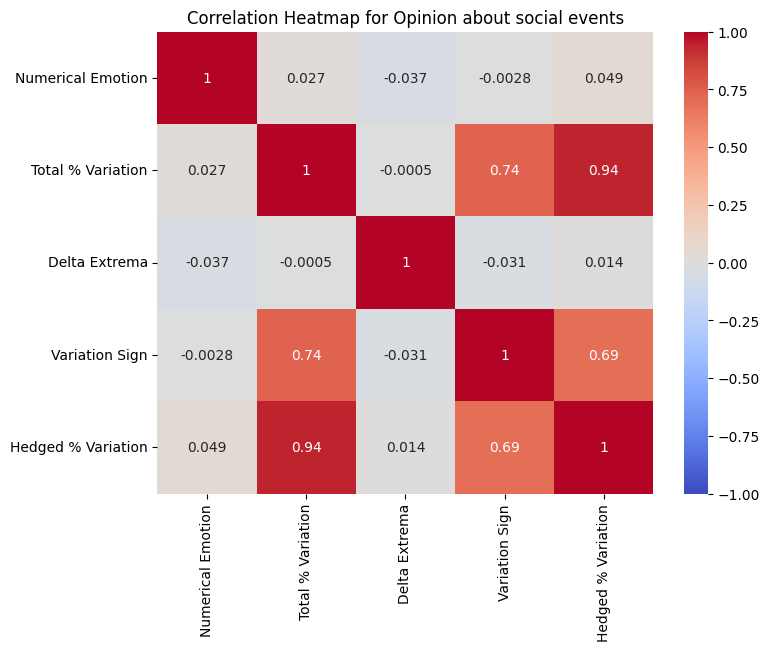


Correlations for classification 'Tesla'. Dimension: 881 rows:
Numerical Emotion vs. Total % Variation: 0.016
Numerical Emotion vs. Delta Extrema: 0.044
Numerical Emotion vs. Variation Sign: 0.032
Numerical Emotion vs. Hedged % Variation: 0.019


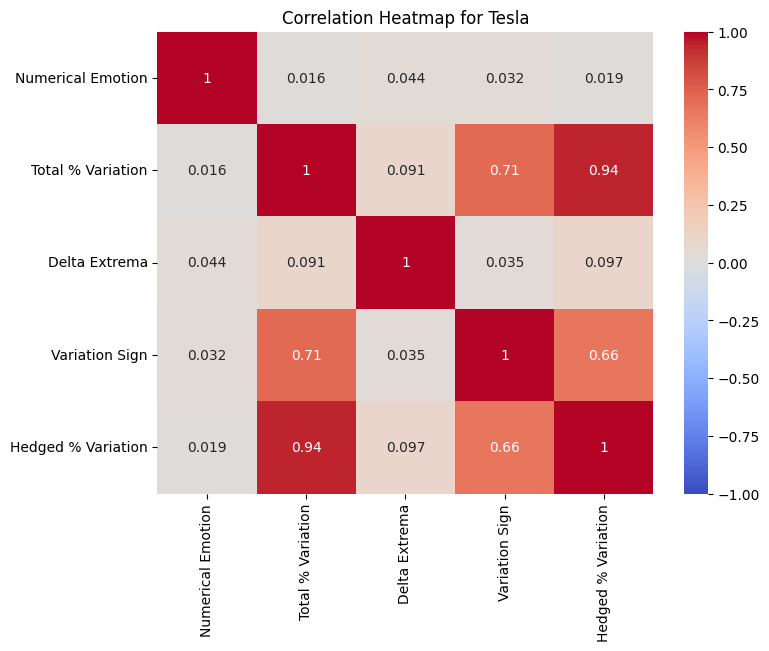


Correlations for classification 'Politics'. Dimension: 406 rows:
Numerical Emotion vs. Total % Variation: 0.029
Numerical Emotion vs. Delta Extrema: -0.013
Numerical Emotion vs. Variation Sign: -0.001
Numerical Emotion vs. Hedged % Variation: 0.030


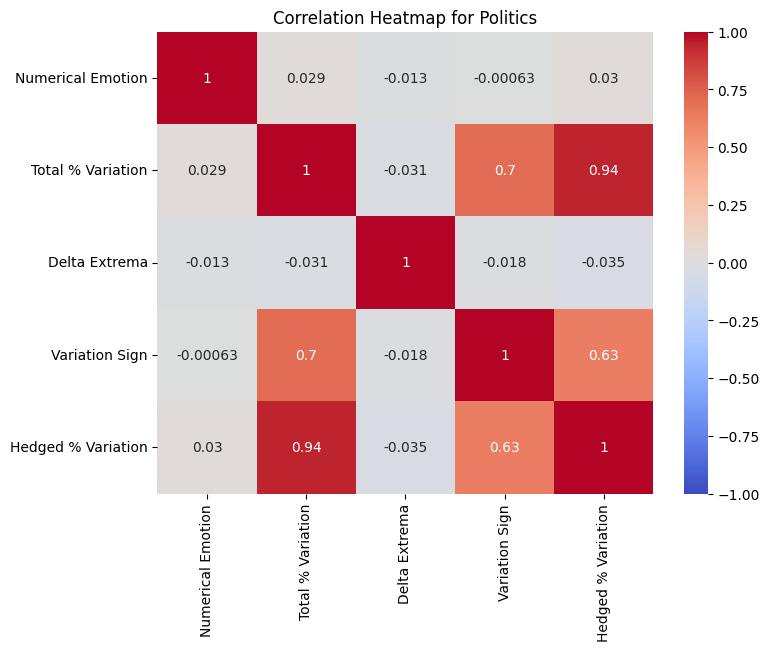


Correlations for classification 'unclear'. Dimension: 540 rows:
Numerical Emotion vs. Total % Variation: 0.015
Numerical Emotion vs. Delta Extrema: -0.059
Numerical Emotion vs. Variation Sign: 0.028
Numerical Emotion vs. Hedged % Variation: 0.035


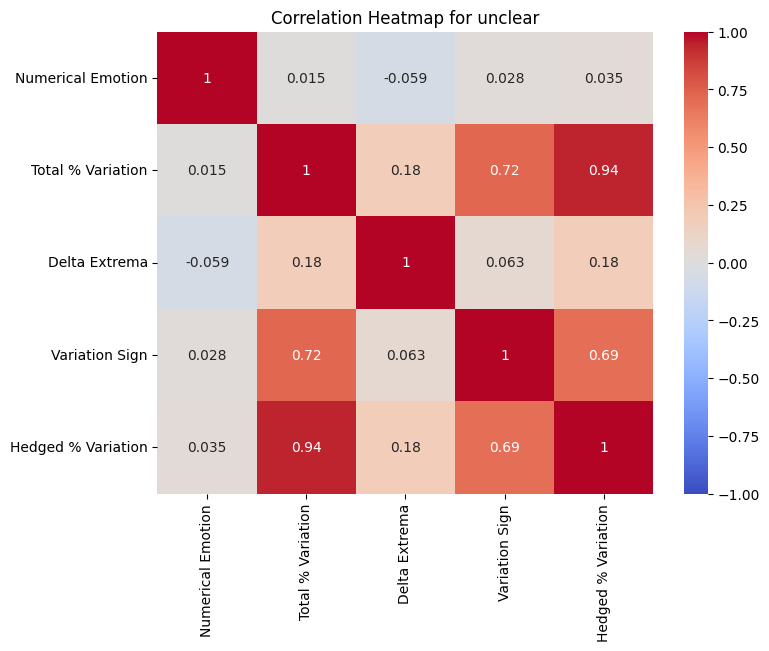


Correlations for classification 'SpaceX'. Dimension: 543 rows:
Numerical Emotion vs. Total % Variation: 0.015
Numerical Emotion vs. Delta Extrema: 0.078
Numerical Emotion vs. Variation Sign: -0.014
Numerical Emotion vs. Hedged % Variation: 0.046


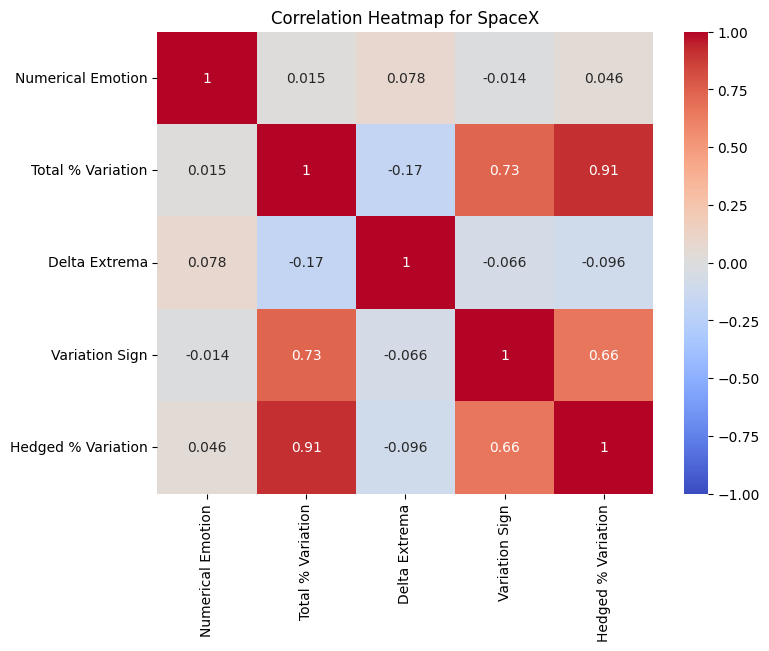


Correlations for classification 'The Boring Company'. Dimension: 15 rows:
Numerical Emotion vs. Total % Variation: -0.075
Numerical Emotion vs. Delta Extrema: 0.087
Numerical Emotion vs. Variation Sign: -0.218
Numerical Emotion vs. Hedged % Variation: -0.032


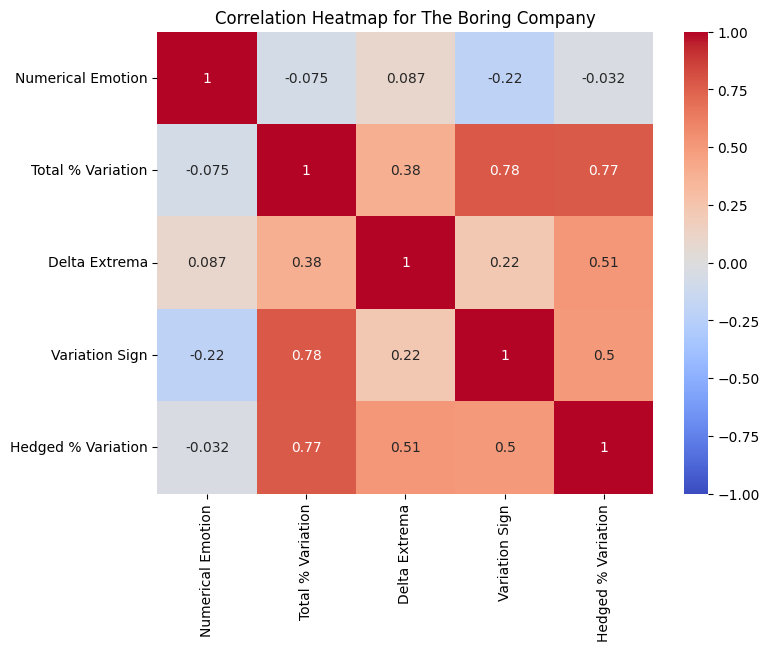

In [20]:
def compute_and_visualize_correlations(df, classification):
    if not df.empty:
        # Columns to include in correlation analysis
        target_columns = ['Total % Variation', 'Delta Extrema', 'Variation Sign', 'Hedged % Variation']

        # Ensure columns exist before calculating correlations
        existing_columns = [col for col in target_columns if col in df.columns]
        if not existing_columns:
            print(f"No relevant columns for correlation analysis in classification: {classification}")
            return

        # Compute correlation matrix
        correlation_matrix = df[['Numerical Emotion'] + existing_columns].corr()

        # Extract and print correlations with Numerical Emotion, including dimensions
        print(f"\nCorrelations for classification '{classification}'. Dimension: {df.shape[0]} rows:")
        for col in existing_columns:
            correlation = correlation_matrix.loc['Numerical Emotion', col]
            print(f"Numerical Emotion vs. {col}: {correlation:.3f}")

        # Plot heatmap (only if there are multiple columns to correlate)
        if len(existing_columns) > 1:
            plt.figure(figsize=(8, 6))
            sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
            plt.title(f'Correlation Heatmap for {classification}')
            plt.show()
        else:
            print(f"No data for classification {classification}")
    else:
        print(f"No data for classification {classification}")

# Compute and visualize correlations for each classification-specific DataFrame
for classification, df in classification_dfs.items():
    compute_and_visualize_correlations(df, classification)

##<u>**Results:**</u>

Our correlation analysis revealed no relevant correlation between the sentiment of Elon Musk’s tweets and Tesla’s stock performance. The most consistent observation was no correlation between numerical emotion and hedged percentage variation. Specifically, the correlation for the categories 'Tesla', 'SpaceX', 'Politics', 'Social Events', and 'Unclear' were 0.019, 0.046, 0.03, 0.049, and 0.035, respectively. These results showed that there is a level of relationship between the sentiment of Elon Musk’s tweets and the fluctuations of the Tesla stock price. The non-existing correlation indicates that there is, on average, no effect on the stock price change based on tweet sentiment.

##<u>**Limitations:**</u>

It is important to note that our financial datasets are based on daily data. Although the market reacts in milliseconds, we can only correlate Elon Musk’s tweets to the daily Tesla stock performance. Therefore, other impactful events occurring on the same day could obscure or erase the immediate effect of the tweets on Tesla’s stock price fluctuations.

Additionally, there is the chance that the average sentiment of the tweet is not correlated with stock performance, but it is still possible that some individual tweets have a significant correlation. However, because of averaging the results, their impact will diminish in the final result. This would explain why specific tweets in the past were able to move the Tesla stock, but we were not able to find this.

Limitations in relation to the classification are that because of the complexity of language, especially if we talk about short sentences and cryptic sentences, it could be hard to distinguish a non-ironic tweet from an ironic tweet. We were able to find examples where the LLM were not able to distinguish between them. It could still be that these tweets have a significant impact despite the low number of potential misses.

In one of your first test runs of the first 300 tweets, we were able to find a correlation of 0.4 for the political topics. This could be a sample bias that we were lucky only to find these samples, but this implies that there are samples that are correlated. But a different explanation could also be that this was the first 300 tweets of the dataset. These are the tweets around the IPO of Tesla in 2010. This could suggest that the tweets Musk at this time had more influence than in the later years when the mark was more settled in, and his tweets had a low impact on stock performances. Or he has become less aggressive with his tweets over time. This, combined with a high number of relevant correlations, could explain the result despite evidence that some specific tweets have moved markets.

It could also be that the concept of sentiment as a simplified measure of a tweet's meaning is not a good enough measure of its impartation. Maybe adding different metrics like replies or answers could change the results.

We have excluded all replies from Elon Musk to somebody because we were not able to classify these tweets because we were missing the contact of the tweet he was replying to. This made it impossible to classify these tweets.



##<u>**Conclusion:**</u>

In conclusion, our correlation analysis showed no remarkable correlation between the sentiment of Elon Musk's tweets and Tesla's stock performance on a daily basis.

However, our simplification discussed in the limitations could be a reason for these results. Based on all these limitations, we are uncertain about the predictive power of our results. Future investigation into stock fluctuation in seconds and more precisely filtering out non-relevant tweets need to be done to be more certain about our results.

This limitation prevented us from discovering accurate short-term market reactions. Nevertheless, it suggests that the social media activities of high-profile executives might have an impact, but these effects are often obscured by other market factors over a longer period of time.
